<a href="https://colab.research.google.com/github/MadhawaAponso/Deeplearning_Tensorflow/blob/main/classification/MutilclassClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [11]:
from tensorflow.keras.datasets import fashion_mnist

In [12]:
(train_data , train_labels),(test_data, test_labels) = fashion_mnist.load_data()

In [13]:
train_data[0].shape

(28, 28)

In [14]:
train_labels.shape

(60000,)

In [15]:
print(train_labels[:10])

[9 0 0 3 0 2 7 2 5 5]


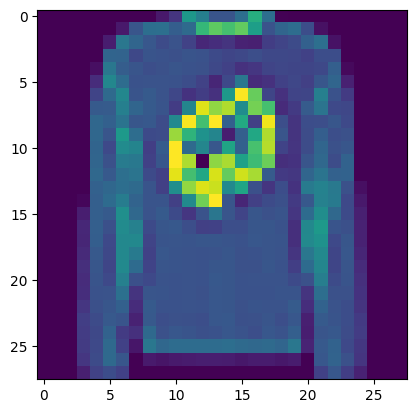

In [16]:
plt.imshow(train_data[123])

In [8]:
# train_labels = tf.keras.utils.to_categorical(train_labels, num_classes=10)
# train_labels.shape
# #print(train_labels[:10])

(60000, 10)

In [18]:

train_data = train_data/255 #noramlizing
#model creation
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),# Converts (28, 28) → (784,)
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dense(64,activation='relu'),
    tf.keras.layers.Dense(10,activation='softmax') #there are 10 classes
])

model.compile(
    loss = tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(learning_rate=  0.01),
    metrics = ['accuracy']
)

history = model.fit(train_data,train_labels,epochs=25)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.6769 - loss: 0.8521
Epoch 2/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8355 - loss: 0.4456
Epoch 3/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8528 - loss: 0.3945
Epoch 4/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8641 - loss: 0.3715
Epoch 5/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8718 - loss: 0.3478
Epoch 6/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8759 - loss: 0.3369
Epoch 7/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.8769 - loss: 0.3322
Epoch 8/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8858 - loss: 0.3102
Epoch 9/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8849 - loss: 0.3079
Epoch 10/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8888 - loss: 0.2980
Epoch 11/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8935 - loss: 0.2864
Epoch 12/25
1875/1875 ━━━

In [20]:
print(history.history)

{'accuracy': [0.7684500217437744, 0.8407833576202393, 0.8567333221435547, 0.8645833134651184, 0.8715500235557556, 0.8764166831970215, 0.8793166875839233, 0.8842499852180481, 0.885116696357727, 0.8880000114440918, 0.8919333219528198, 0.8920833468437195, 0.8945666551589966, 0.8966833353042603, 0.8981500267982483, 0.899316668510437, 0.9002666473388672, 0.9002500176429749, 0.9022666811943054, 0.9046833515167236, 0.9056333303451538, 0.9058166742324829, 0.9081166386604309, 0.9074166417121887, 0.909166693687439], 'loss': [0.6230320930480957, 0.4317968487739563, 0.39053574204444885, 0.36552467942237854, 0.3481948971748352, 0.33641675114631653, 0.32625338435173035, 0.31421077251434326, 0.30839717388153076, 0.29900696873664856, 0.2905115485191345, 0.2881668508052826, 0.28119954466819763, 0.277025043964386, 0.2729319632053375, 0.2692044973373413, 0.266824871301651, 0.263841837644577, 0.25870469212532043, 0.25522398948669434, 0.2517372965812683, 0.24953816831111908, 0.24439124763011932, 0.24346308

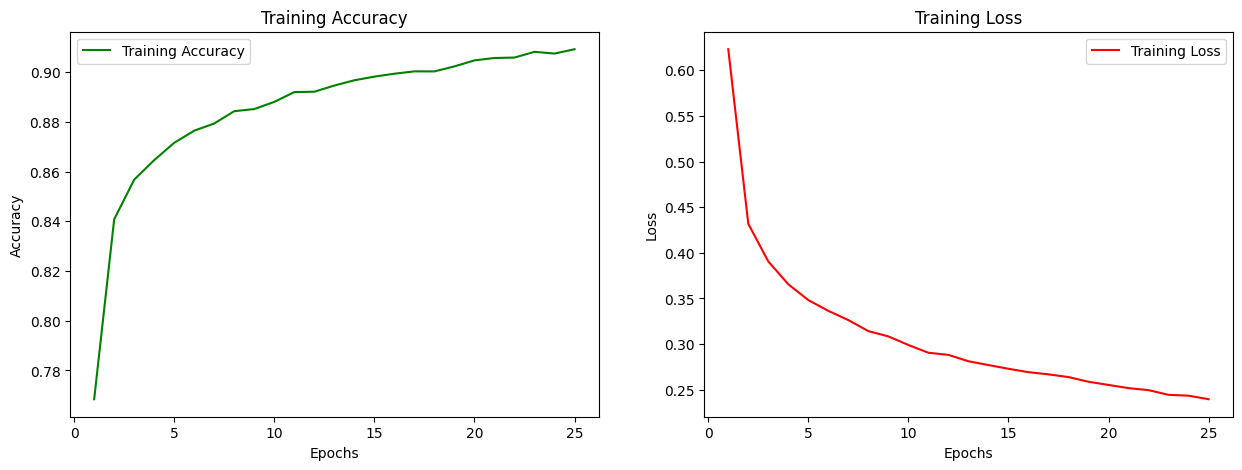

In [24]:
epochs = range(1, 26)

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, history.history['accuracy'], 'g', label='Training Accuracy')
# plt.plot(epochs, history.history['val_accuracy'], 'r', label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs, history.history['loss'], 'r', label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training Loss')

plt.show()


In [41]:
test_norm = test_data/255.0

In [42]:
predictions = model.predict(test_norm)
predictions

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


array([[0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 9.9999994e-01],
       [0.0000000e+00, 0.0000000e+00, 9.9999994e-01, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 9.9999994e-01, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       ...,
       [9.9999994e-01, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 9.9999994e-01, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 1.2627831e-29, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00]], dtype=float32)

In [47]:
# Get the index of the maximum value (predicted class)
predicted_class = tf.argmax(predictions[12]).numpy()  # Convert to NumPy integer
print(predicted_class)

5


In [33]:
val_history = model.evaluate(test_data/255.0 , test_labels)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7188 - loss: 142.9494


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


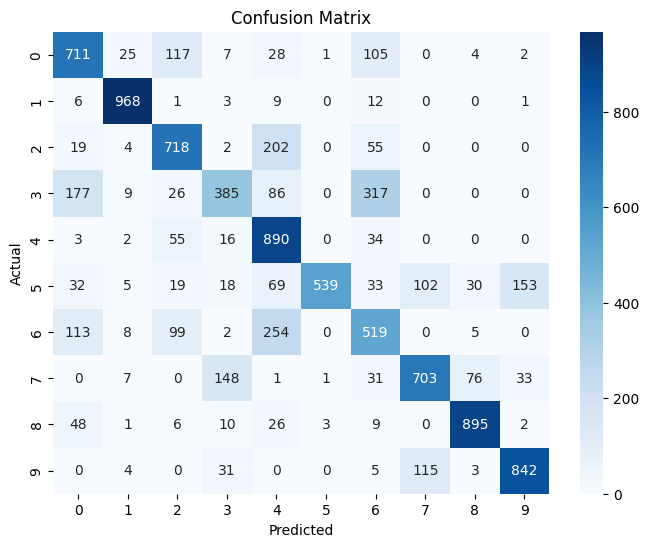

In [34]:

from sklearn.metrics import confusion_matrix

# Step 1: Get predictions
test_norm= test_data/255.0
y_pred_probs = model.predict(test_norm)  # Get probability outputs
y_pred = np.argmax(y_pred_probs, axis=1)  # Convert probabilities to class labels

# Step 2: Compute confusion matrix
cm = confusion_matrix(test_labels, y_pred)

# Step 3: Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In multi class classification if you are using one hot data use catogoricalclassification()
If you are using normal values use SparseCatogoricalClassification